In [134]:
import string
from collections import Counter
import json
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

In [9]:
cipher ="""
wsam ie pjo ysgtm eyipbya .P axg niphay y,
        mey syw ahgm ewhrg tw hmysyam wh meyiepjo
        ys .Ag jygtmeyk pmys ie pjo ysavw kkoyjgsy
        whmy sy amwh rmephmewagh y!Me yigu ynay utg
        smew ajya apr ywap awjfkya no a mwmnmw
        ghiwfeyswhve wieuwr wm aepby oyyhae wtmy
        uox8 fkpiya. Me y fpaavgs uwa mxSrN03u wd
        dvwmegnmmey dngmya. Mew awameyt"""

In [37]:
# Strip all punctuation from string and make upper case
encrypted_string = cipher.translate(str.maketrans(dict.fromkeys(string.punctuation))).replace('\n','').replace(' ','').replace('0','').replace('3','').replace('8','').upper()

In [38]:
encrypted_string

'WSAMIEPJOYSGTMEYIPBYAPAXGNIPHAYYMEYSYWAHGMEWHRGTWHMYSYAMWHMEYIEPJOYSAGJYGTMEYKPMYSIEPJOYSAVWKKOYJGSYWHMYSYAMWHRMEPHMEWAGHYMEYIGUYNAYUTGSMEWAJYAAPRYWAPAWJFKYANOAMWMNMWGHIWFEYSWHVEWIEUWRWMAEPBYOYYHAEWTMYUOXFKPIYAMEYFPAAVGSUWAMXSRNUWDDVWMEGNMMEYDNGMYAMEWAWAMEYT'

In [150]:
cnt = Counter().update({x:0 for x in string.ascii_uppercase})
encrypted_string_freq = dict(sorted(Counter(encrypted_string).items(),key=lambda x: x[1], reverse=True))
encrypted_string_percentages = dict(sorted({key:encrypted_string_freq[key]*100/float(len(encrypted_string)) for key in encrypted_string_freq.keys()}.items(),key=lambda x: x[1], reverse=True))

In [161]:
cnt = Counter()
cnt.update({x:0 for x in string.ascii_uppercase})
cnt.update(encrypted_string)
encrypted_string_freq = dict(sorted(cnt.items(),key=lambda x: x[1], reverse=True))
encrypted_string_percentages = dict(sorted({key:encrypted_string_freq[key]*100/float(len(encrypted_string)) for key in encrypted_string_freq.keys()}.items(),key=lambda x: x[1], reverse=True))

In [91]:
with open('english_monogram.json') as json_file: 
    english_monogram = json.load(json_file)

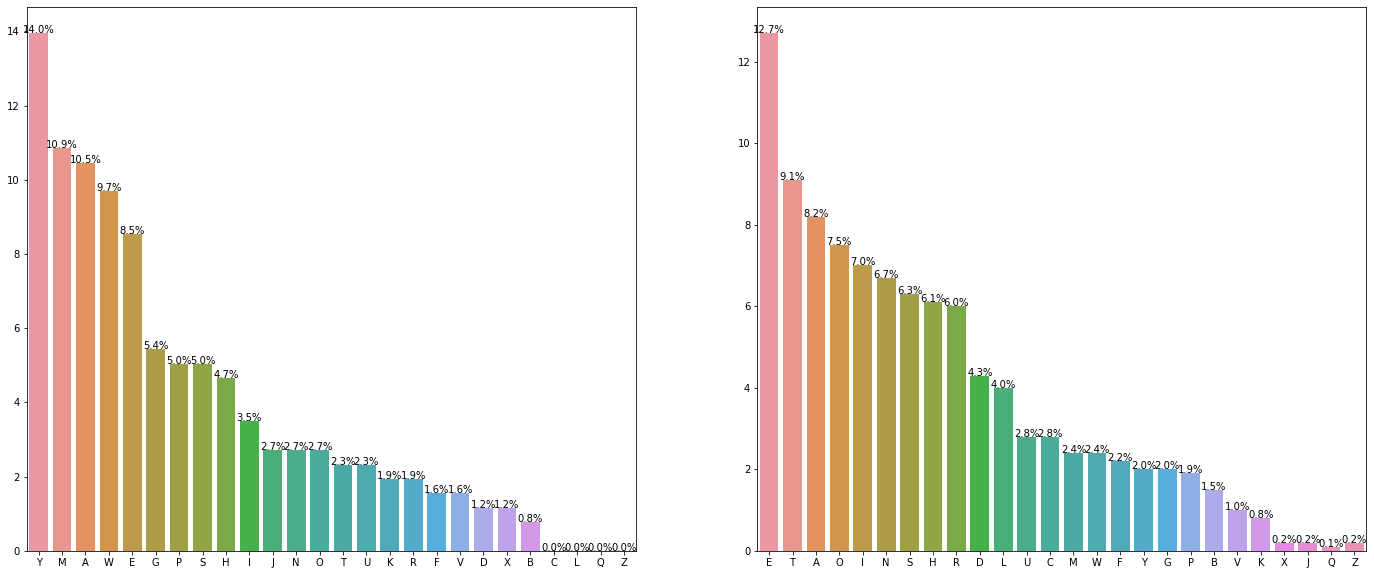

In [162]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(24,10))
sns.barplot(list(encrypted_string_percentages.keys()), list(encrypted_string_percentages.values()),ax=ax1)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + (p.get_width()/2)
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
sns.barplot(list(english_monogram.keys()), list(english_monogram.values()),ax=ax2)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + (p.get_width()/2)
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
fig.show()

In [105]:
with open('english_bigrams.txt') as file:
    lines = file.read().splitlines()
    total = sum([int(x.split()[1]) for x in lines ])
    english_bigram = {x.split()[0]:float(x.split()[1])/total for x in lines}

In [182]:
with open('english_words.txt') as file:
    english_words = file.read().splitlines()
with open('golden_words.txt') as file:
    golden_words = file.read().splitlines()

In [177]:
def score_text(text, letter_percents, bigram_percents,english_words,golden_words,letter_weight=1.0,bigram_weight=1.0,word_weight=10.0,golden_weight=500.0)
    total_weight = letter_weight + bigram_weight + word_weight + golden_weight
    letter_weight = letter_weight / total_weight
    bigram_weight = bigram_weight / total_weight
    word_weight = word_weight / total_weight
    golden_weight = golden_weight / total_weight

    total_logprob = 0
    for c1, c2 in zip(text[:-1], text[1:]):
        letter_prob = letter_percents[c1]/100
        bigram_prob = bigram_percents[c1 + c2]/100
        total_logprob += math.log(
            letter_weight * letter_prob +
            bigram_weight * bigram_prob
        )

    return total_logprob

In [173]:
score_text(encrypted_string,english_monogram,english_bigram)

-930.8437759497639

In [175]:
def optimize_key(encrypted_string,decrypt_key,letter_percents, bigram_percents):
    iterations = int(1e6)
    print_every = 100000 
    best_score =  score_text(encrypted_string, letter_percents, bigram_percents)
    for iter_num in range(iterations):
        a, b = random.choices(string.ascii_uppercase, k=2)
        decrypt_key[a], decrypt_key[b] = decrypt_key[b], decrypt_key[a]
        current_decrypt = decrypt(decrypt_key,encrypted_string)
        new_score = score_text(current_decrypt, letter_percents, bigram_percents)
        if new_score > best_score:
            best_score = new_score
        else:
            # Swap back
            decrypt_key[a], decrypt_key[b] = decrypt_key[b], decrypt_key[a]
        # Check progress
        if iter_num % print_every == 0:
            print('{n}: {d}'.format(n=iter_num,
                                d=current_decrypt))

In [124]:
def decrypt(decrypt_key,encrypted_string):
    return "".join([ decrypt_key[x] if x in decrypt_key.keys() else x for x in encrypted_string])


In [174]:
decrypt_key = {list(encrypted_string_percentages.keys())[i]:list(english_monogram.keys())[i] for i in range(len(encrypted_string_percentages.keys()))}

In [180]:
optimize_key(encrypted_string,decrypt_key,english_monogram,english_bigram)

In [171]:
score_text(decrypt(decrypt_key,encrypted_string),english_monogram,english_bigram)

-902.181613034406